In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
#Graphing libraries
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "plotly_dark"


In [112]:
years = [x for x in range(2015,2020)]
df={}
for year in years:
    url = f"../UWA-Project/Output/{year}.csv"
    pd.set_option("display.max_rows",800)
    df[year] = pd.read_csv(url)
    
url_concat = f"../UWA-Project/Output/concated_df.csv"
df_concat = pd.read_csv(url_concat)
#Unpacking the df
df_2015,df_2016,df_2017,df_2018,df_2019 = df[2015],df[2016],df[2017],df[2018],df[2019]

In [113]:
for year in years:
    print(f"""{year} \n{df[year].columns}
----------""")

2015 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------
2016 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------
2017 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------
2018 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_R

In [114]:
df[2016].tail(10)

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
147,Madagascar,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


# Horizontal Bars

In [180]:
top_10 = {}
bottom_10 = {}
combined_10 = {}

for year in years:
        top_10[year] =df[year].set_index('Country')
        top_10[year] = df[year].loc[:,['Country','Economy_(GDP_per_Capita)','Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual']].head(10)
        bottom_10[year] = df[year].set_index('Country')
        bottom_10[year] = df[year].loc[:,['Country','Economy_(GDP_per_Capita)','Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual']].tail(10)
        combined_10[year] = pd.concat([bottom_10[year][::-1],top_10[year][::-1]]).set_index('Country',drop=True)
#         combined_10[year].iplot(kind='barh',title= f'{year} Top-Bottom Analysis',barmode='stack',bargap=.3)
        fig =px.bar(combined_10[year], color_discrete_sequence = px.colors.colorbrewer.Paired,orientation='h',title= f'{year} Top-Bottom Analysis',barmode='stack', labels=dict(Country="Countries", value="Happiness Score", variable="Contributing Factors"))
        fig.show()


# Correlational Heatmaps

2015


<Figure size 1440x864 with 0 Axes>

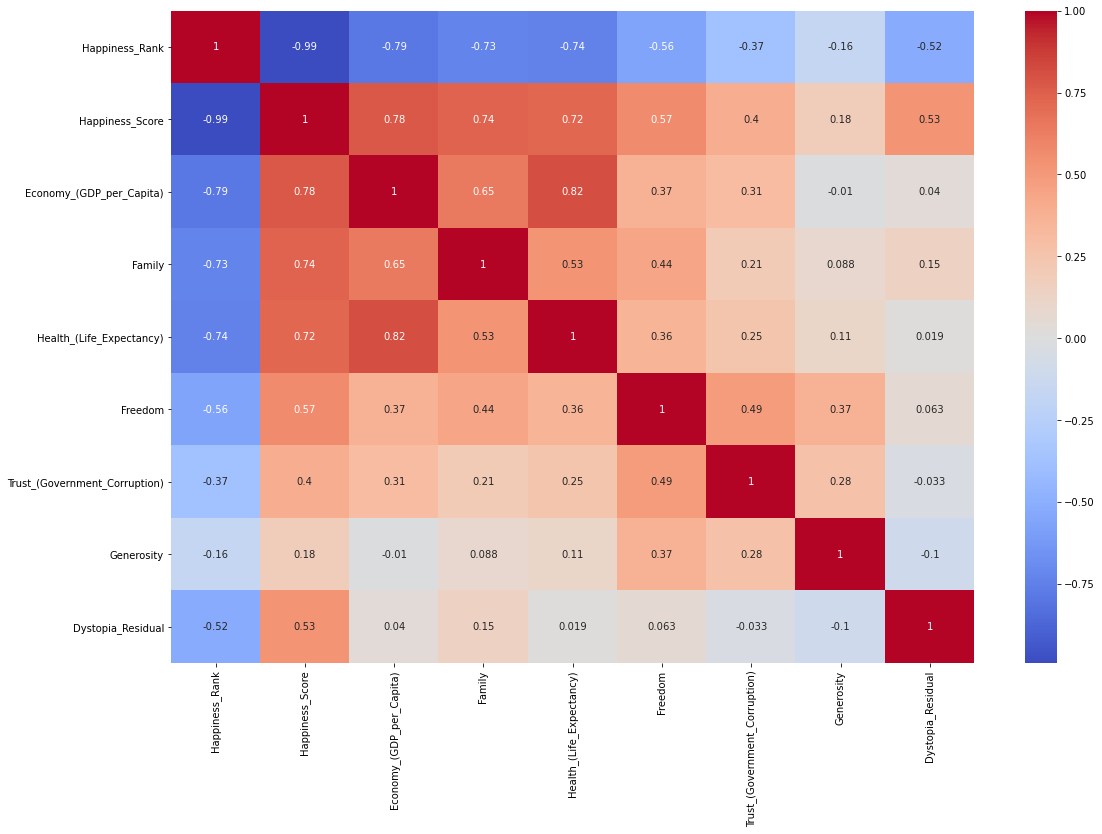

2016


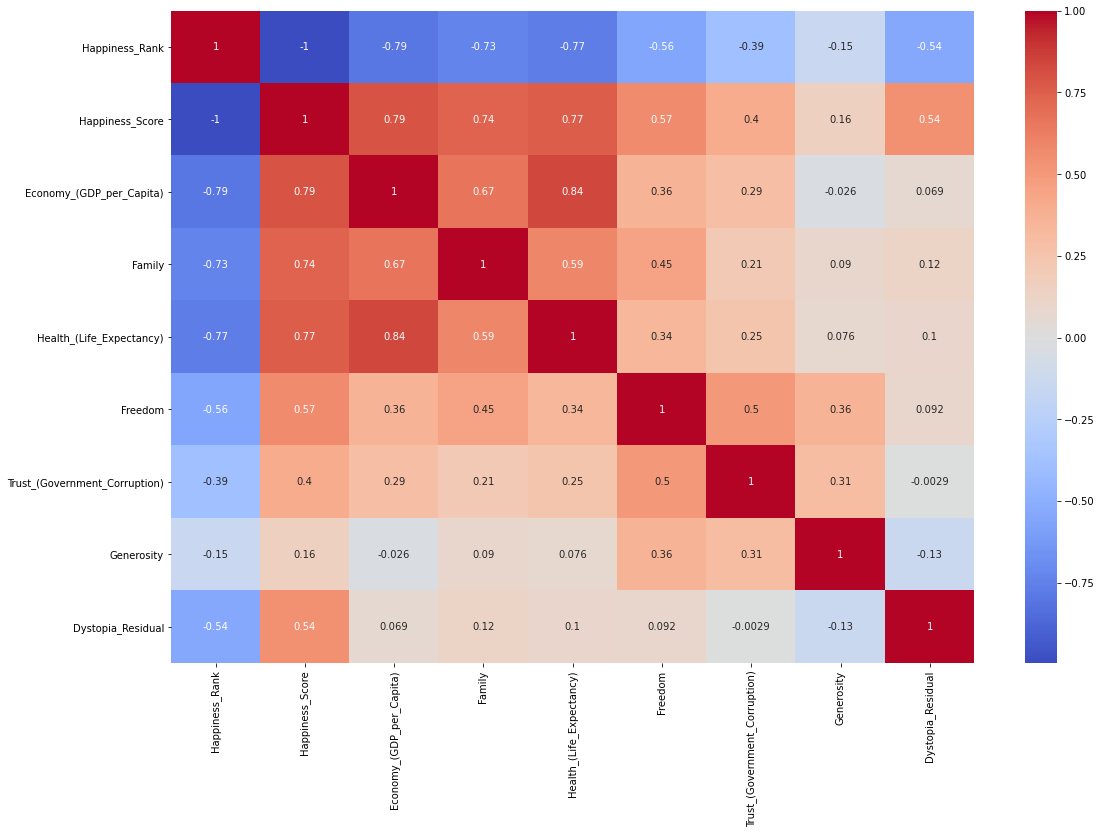

2017


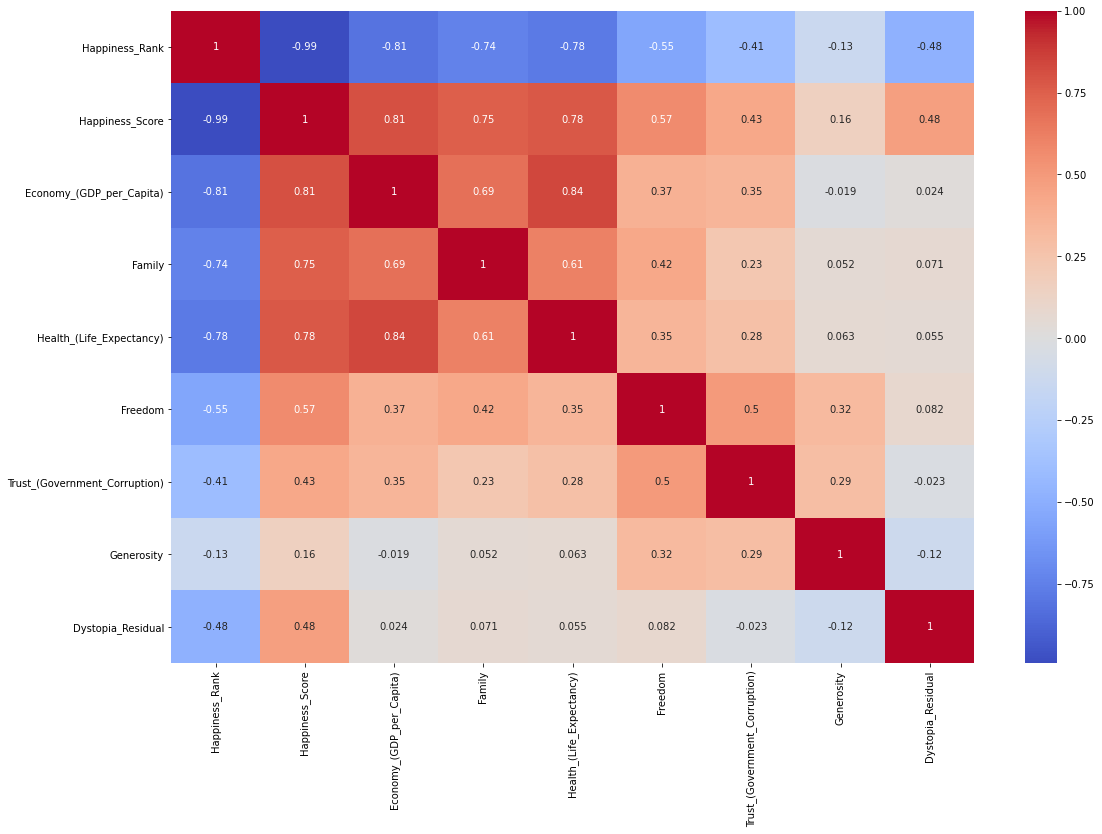

2018


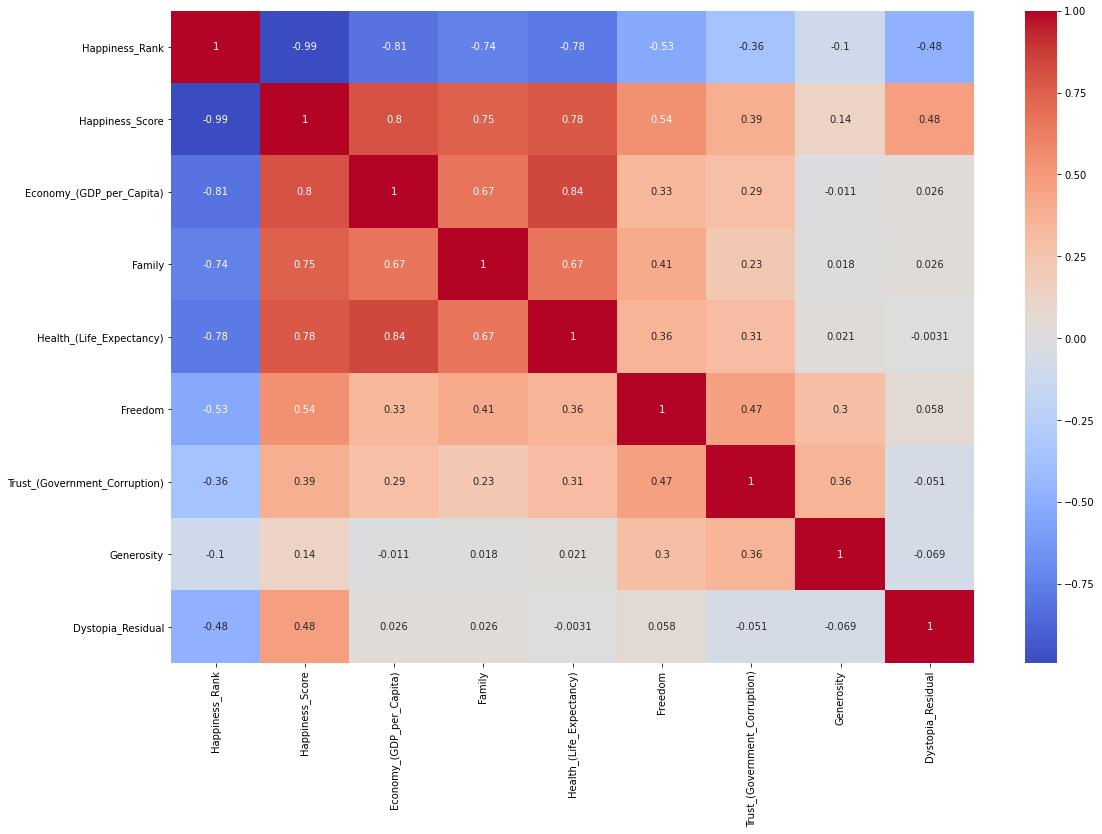

2019


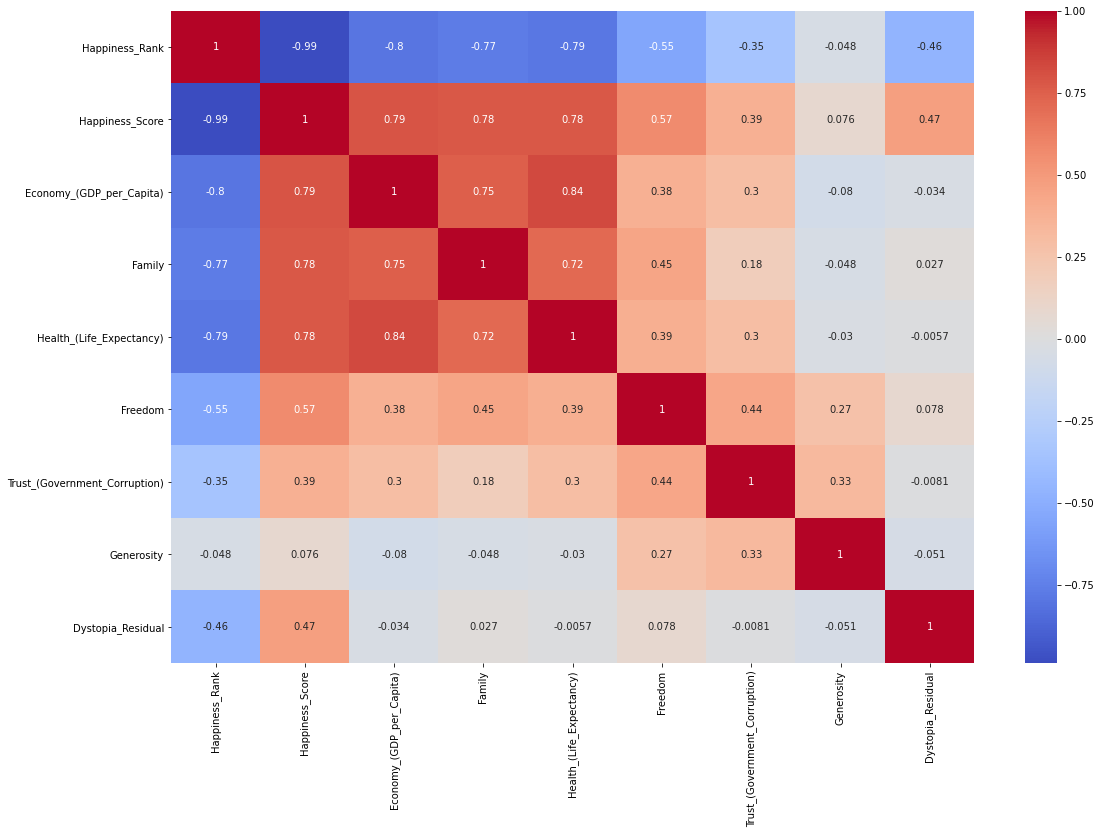

In [181]:
plt.figure(figsize=(20,12))
heatmap_corr={}
for year in years:
    heatmap_corr[year] = df[year]
    plt.figure(figsize=(18,12))
    print(year)
    sns.heatmap(heatmap_corr[year].corr(),cmap='coolwarm', annot=True)
    plt.show()

    
    

In [136]:
df_concat.sort_values('year',inplace=True)
df_concat

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
477,Bosnia and Herzegovina,96,4.949,0.832230,0.919160,0.790810,0.092450,0.002270,0.248080,2.063670,2015
482,Lesotho,97,4.898,0.375450,1.041030,0.076120,0.317670,0.125040,0.163880,2.798320,2015
489,Dominican Republic,98,4.885,0.895370,1.172020,0.668250,0.576720,0.142340,0.216840,1.213050,2015
491,Laos,99,4.876,0.590660,0.738030,0.549090,0.595910,0.242490,0.421920,1.737990,2015
496,Mongolia,100,4.874,0.828190,1.300600,0.602680,0.436260,0.026660,0.332300,1.347590,2015
503,Swaziland,101,4.867,0.712060,1.072840,0.075660,0.306580,0.030600,0.182590,2.486760,2015
507,Greece,102,4.857,1.154060,0.929330,0.882130,0.076990,0.013970,0.000000,1.801010,2015
471,Albania,95,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,1.898940,2015
510,Lebanon,103,4.839,1.025640,0.800010,0.839470,0.339160,0.045820,0.218540,1.570590,2015


In [169]:
fig = px.scatter(df_concat, x="Economy_(GDP_per_Capita)", y="Health_(Life_Expectancy)", animation_frame="year", animation_group="Country",size="Happiness_Score", hover_name="Country",color="Family",range_x=[0.01,5],range_y=[-5,5], log_x=True, size_max=35)# ,color_continuous_scale='Inferno',color="continent"

# fig["layout"].pop("updatemenus") # optional, drop animation buttons

# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'linear',
#         tick0 = 0,
#         dtick = 0.5
#     )
# )
fig.show()

In [185]:
df[2016]

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [216]:
aus_data = df[2016].loc[df[2016]['Country']=='Australia'].values
top_data = df[2016].iloc[0,:].values
country_name = top_data[0]
top_data[3:-1]
aus_data[0][3:-1]
country_name

'Denmark'

In [221]:

categories = ['Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=top_data[3:-1],
      theta=categories,
      fill='toself',
      name=f'{country_name}'
))
fig.add_trace(go.Scatterpolar(
      r=aus_data[0][3:-1],
      theta=categories,
      fill='toself',
      name='Australia'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 2]
    )),
  showlegend=True
)

fig.show()

